In [8]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'ERPDB' 
database = 'TEST0429' 
username = 'test' 
password = 'apple123' 
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = conn.cursor()

In [3]:
## Read SQL data to Pandas data frame ##
sql_query = pd.read_sql_query('SELECT* FROM [TEST0429].[dbo].[Order vs Purchase time series full outer join]',conn, index_col='DATE')
print(sql_query.head())
print(type(sql_query))

            Purchase      Order  Difference
DATE                                       
2014-01-15       0.0  5652240.0         0.0
2014-02-15       0.0  1595675.0         0.0
2014-03-15       0.0  3270100.0         0.0
2014-04-15       0.0  1180760.0         0.0
2014-05-07       0.0   500000.0         0.0
<class 'pandas.core.frame.DataFrame'>


In [11]:
## Set Useful ploting function ##
def comparison_plot(data_plot,t):
    plt.rcParams['figure.figsize']=[15,10]
    plt.style.use('ggplot')
    graph=df.loc['%s'%t:,data_plot].plot(marker='o', alpha=0.5, linestyle='--', figsize=(20, 10), subplots=False,legend=True)
    graph.set_ylabel('amount(ntd 1x10^8)')
    graph.set_xlabel('Time frame')

In [12]:
## Set Useful ploting function ##
def quick_subplot(data_plot,t):
    axes = df.loc['%s'%t:,data_plot].plot(marker='o', alpha=0.5, linestyle='--', figsize=(20, 10), subplots=True,legend=True)
    for ax in axes:
        ax.set_ylabel('amount(ntd 1x10^8)')
        ax.set_xlabel('Time frame')

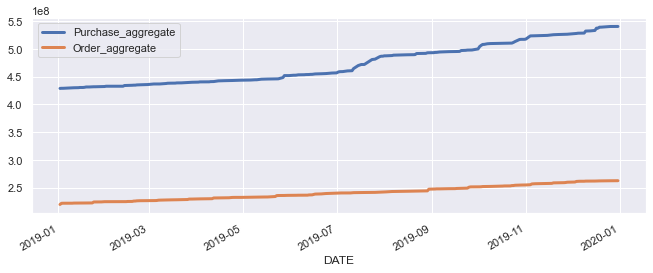

In [24]:
df.loc['2019','Purchase_aggregate'].plot(linewidth=3,legend=True)
df.loc['2019','Order_aggregate'].plot(linewidth=3,legend=True)

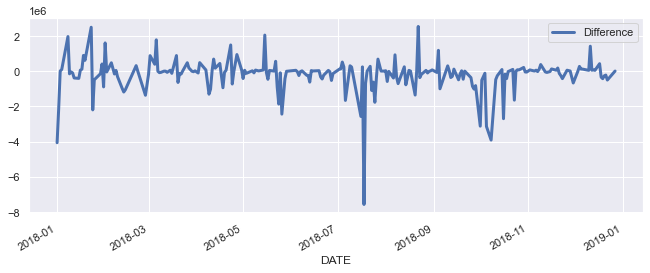

In [25]:
df.loc['2018','Difference'].plot(linewidth=3,legend=True)

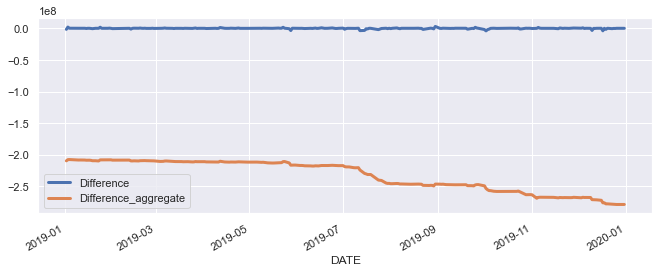

In [28]:
df.loc['2019','Difference'].plot(linewidth=3,legend=True)
df.loc['2019','Difference_aggregate'].plot(linewidth=3,legend=True)

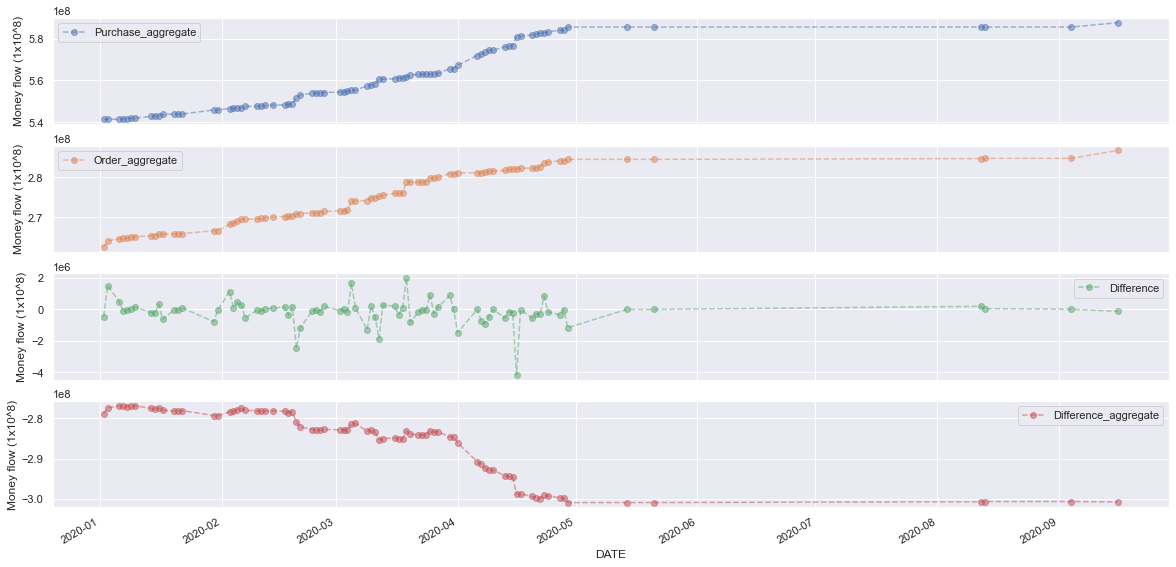

In [35]:
cols_plot = ['Purchase_aggregate', 'Order_aggregate', 'Difference','Difference_aggregate']
axes = df.loc['2018':,cols_plot].plot(marker='o', alpha=0.5, linestyle='--', figsize=(20, 10), subplots=True,legend=True)
for ax in axes:
    ax.set_ylabel('Money flow (1x10^8)')